<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">Title: Email Spam Detection</h1>

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Muhammad Mubashir</h1>

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-mubashir-4441072ba/)


[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:mubashir.dev.02@gmail.com)


`Dataset:` [Spam Detection](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data)\
`Date: `2024/06/09

# **Introduction**
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

## Load the data

In [2]:
df = pd.read_csv('./spam.csv', encoding = 'LATIN-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# **EDA**

## Clean the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### drop columns that are unnecessary

In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### rename the columns

In [5]:
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### let's make label ham = 0, spam = 1

In [6]:
label_map = {'ham': 0, 'spam': 1}
df['label'] = df['label'].map(lambda x: label_map[x])
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Missing values

In [7]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [9]:
df.shape

(5572, 2)

- No value is missing in the dataset.

In [10]:
df.label.value_counts()

label
0    4825
1     747
Name: count, dtype: int64

## Check for Duplicates

In [11]:
df.text.nunique()

5169

In [12]:
df.duplicated().sum()

403

In [13]:
## print rows with duplicate values
print(df[df.duplicated(keep=False)])

      label                                               text
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
7         0  As per your request 'Melle Melle (Oru Minnamin...
8         1  WINNER!! As a valued network customer you have...
9         1  Had your mobile 11 months or more? U R entitle...
11        1  SIX chances to win CASH! From 100 to 20,000 po...
...     ...                                                ...
5524      1  You are awarded a SiPix Digital Camera! call 0...
5535      0  I know you are thinkin malaria. But relax, chi...
5539      0                         Just sleeping..and surfing
5553      0                        Hahaha..use your brain dear
5558      0                             Sorry, I'll call later

[684 rows x 2 columns]


In [14]:
# drop duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

## Count plot

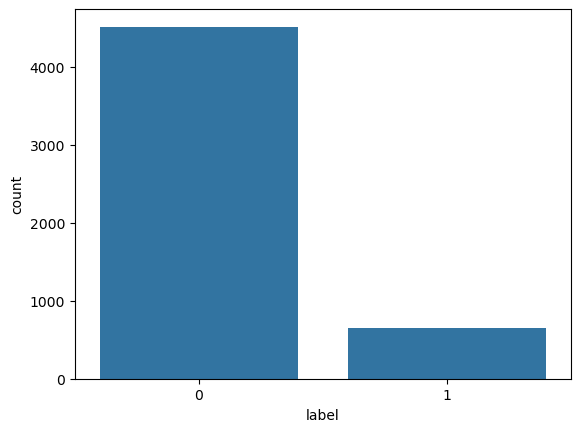

In [16]:
# bar plot of label distribution
sns.countplot(x='label', data=df)
plt.show()

## Pie chart

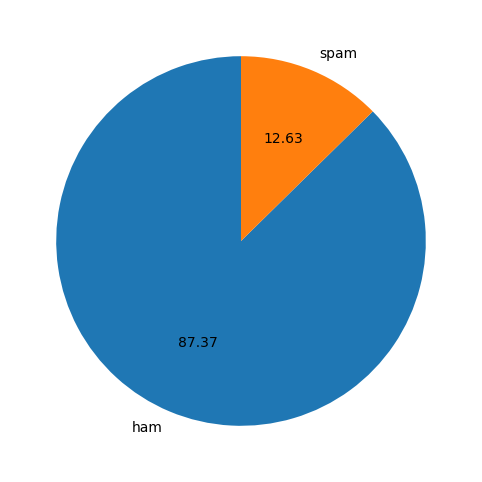

In [17]:
plt.figure(figsize=(10, 6))
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%1.2f", startangle=90)
plt.show()

## Bar chart of spam words

In [18]:
# Create a list of all words in the spam messages
spam_words = ' '.join(df.query('label == 1')['text']).split()

# Count the occurrences of each word
word_counts = Counter(spam_words)

# Create a DataFrame with the words and their frequencies
word_counts_df = pd.DataFrame(word_counts.most_common(15), columns=['Word', 'Frequency'])

# Plot the bar chart
px.bar(word_counts_df, x='Word', y='Frequency', title='Top 15 Most Frequent Words in Spam Messages')

## Bar chart of ham words

In [19]:
# Create a list of all words in the spam messages
ham_words = ' '.join(df.query('label == 0')['text']).split()

# Count the occurrences of each word
word_counts = Counter(ham_words)

# Create a DataFrame with the words and their frequencies
word_counts_df = pd.DataFrame(word_counts.most_common(15), columns=['Word', 'Frequency'])

# Plot the bar chart
px.bar(word_counts_df, x='Word', y='Frequency', title='Top 15 Most Frequent Words in Non Spam Messages')

## Bar chart of length of messages

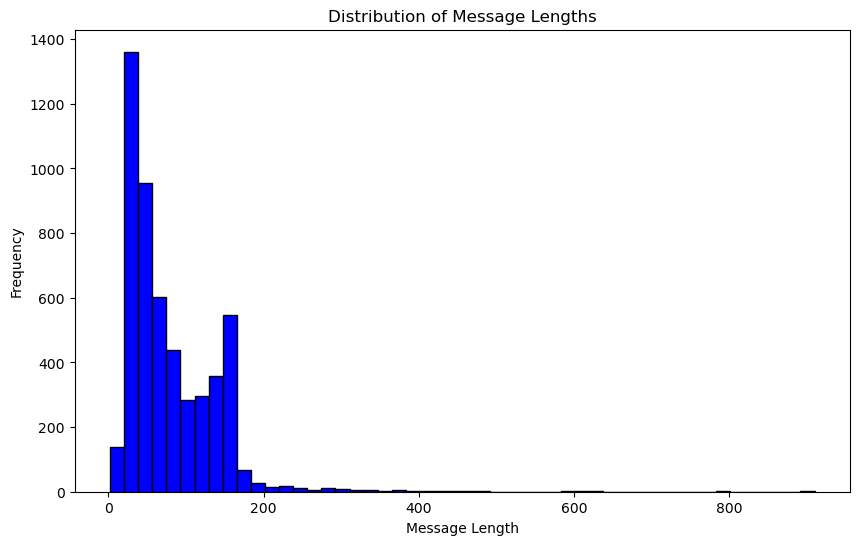

In [20]:
import warnings
warnings.filterwarnings('ignore')

# Calculate the length of each message
df['message_length'] = df['text'].apply(len)

# Plot the distribution of message lengths
plt.figure(figsize=(10, 6))
plt.hist(df['message_length'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

## Split the data

In [21]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X.shape

(5169,)

## Encode the data

In [23]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# **Model Selection**

Models that we will use:

- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- AdaBoost
- Gradient Boosting
- Naive Bayes

In [24]:
from sklearn.model_selection import cross_val_score

models = [
    ('LogisticRegression', LogisticRegression()),
    ('SVC', SVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB())
]

best_model = None
best_accuracy = 0
# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline



# save the best model
import pickle
pickle.dump(best_model, open('email_spam_classifier.pkl', 'wb'))
print("-----------------------------------------------------------")
print(f"Best model: {best_model} with accuracy score: {best_accuracy}")

Model: LogisticRegression
Cross-validation Accuracy: 0.9496977025392986
Test Accuracy: 0.9680851063829787

Model: SVC
Cross-validation Accuracy: 0.969528415961306
Test Accuracy: 0.9845261121856866

Model: DecisionTreeClassifier
Cross-validation Accuracy: 0.9591293833131802
Test Accuracy: 0.9613152804642167

Model: RandomForestClassifier
Cross-validation Accuracy: 0.9724304715840386
Test Accuracy: 0.9748549323017408

Model: AdaBoostClassifier
Cross-validation Accuracy: 0.9668681983071343
Test Accuracy: 0.9729206963249516

Model: GradientBoostingClassifier
Cross-validation Accuracy: 0.9680773881499395
Test Accuracy: 0.9661508704061895

Model: MultinomialNB
Cross-validation Accuracy: 0.9489721886336155
Test Accuracy: 0.9555125725338491

Model: BernoulliNB
Cross-validation Accuracy: 0.9762998790810157
Test Accuracy: 0.9738878143133463

-----------------------------------------------------------
Best model: BernoulliNB with accuracy score: 0.9845261121856866


# **Inference**

In [25]:
# load the save model
model = pickle.load(open('email_spam_classifier.pkl', 'rb'))

In [26]:
# test the model with new data
def inference(message):
    message = tfidf.transform(message)[0]
    pred = best_model.predict(message)
    if pred == 0:
        print('This is a ham message')
    else:
        print('This is a spam message')

In [27]:
new_data = ["Don't forget about the team lunch tomorrow at 1 PM. See you there!"]
inference(new_data)

new_data = ["Congratulations! You have won 1,000,000. Claim your prize now!"]
inference(new_data)

This is a ham message
This is a spam message
